# Dimensionality Reduction

## Correlation

In the following codes we want to analyze some climate data from the climate station Berlin-Dahlem. For this purpose, you can download the data here or import it directly into your Python environment using the pandas package to store the information as dataframe object over the pd.read_csv()function.



In [9]:
import pandas as pd
import numpy as np

dahlem_weather = pd.read_csv("https://userpage.fu-berlin.de/soga/data/raw-data/dahlem_station_weather_data.csv").dropna()

In [11]:
dahlem_weather.head(10)

,year,season,humidity,temperature,cloudiness,sunlight
0,1950,autumn,0.072661,8.853846,5.851648,3.086813
2,1950,summer,0.107960,18.555435,4.527174,9.017391
4,1951,autumn,0.076511,10.226374,4.491209,4.807692
5,1951,spring,0.057679,7.863043,4.971739,5.772826
6,1951,summer,0.107765,18.101087,4.740217,7.383696
7,1951,winter,0.048169,2.377778,6.288889,1.443333
8,1952,autumn,0.068069,6.931868,6.360440,2.547253
9,1952,spring,0.061328,8.659783,4.727174,5.933696
10,1952,summer,0.107414,17.370652,4.584783,8.200000
11,1952,winter,0.045049,0.631868,6.532967,1.226374


[Text(0.5, 0, 'Temperature in 2 m above ground (°C)'),
 Text(0, 0.5, 'Humidity (g/kg)')]

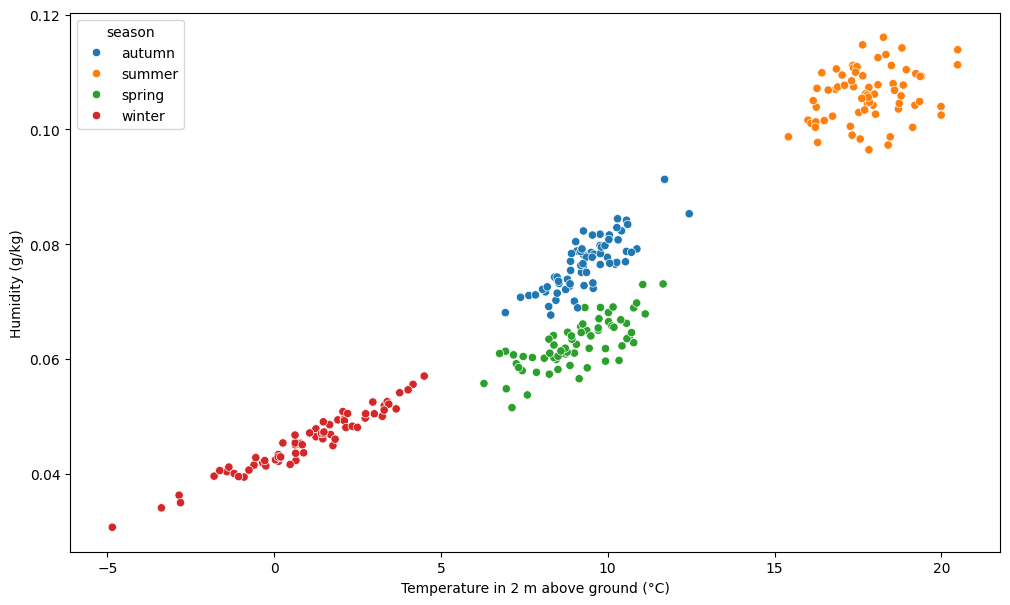

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))

sns.scatterplot(
    data=dahlem_weather,
    x="temperature", y="humidity", 
    hue="season"
).set(
    xlabel='Temperature in 2 m above ground (°C)',
    ylabel='Humidity (g/kg)'
)

Calculate the Pearson correlation coefficient for the variables temperature and humidity, during summer (a) and winter (b)!

(a) Summer season:

In [13]:
from scipy.stats import pearsonr

summer = dahlem_weather.loc[dahlem_weather.season == "spring"]

print("r summer season: {}".
      format(round(pearsonr(summer["temperature"], summer["humidity"]).statistic, 4)))


r summer season: 0.7397


(b) Winter season:

In [14]:
winter = dahlem_weather.loc[dahlem_weather.season == "autumn"]

print("r winter season: {}".
      format(round(pearsonr(winter["temperature"], winter["humidity"]).statistic, 4)))

r winter season: 0.7997


Plot a panel of correlation plots for the variables humidity, temperature, cloudiness and sunlight using the provided UDFs! Try different methods (Spearman, Pearson). Which one yields better results and why?

In [6]:
from scipy.stats import pearsonr, spearmanr
def reg_coef(x, y , label=None, color=None, **kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center', size = 20)
    ax.set_axis_off()

def reg_spear_coef(x, y , label=None, color=None, **kwargs):
    ax = plt.gca()
    r,p = spearmanr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center', size = 20)
    ax.set_axis_off()

Pearson:

<Figure size 1200x700 with 0 Axes>

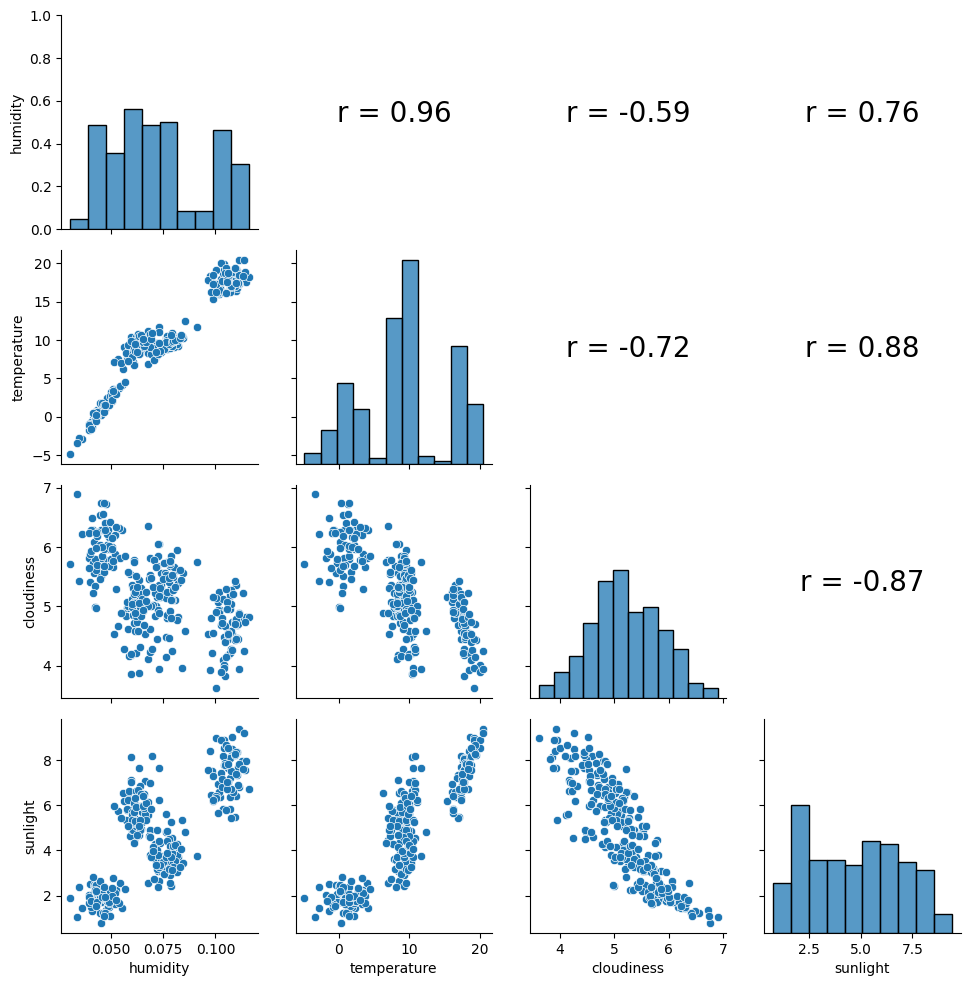

In [7]:
plt.figure(figsize=(12,7))
g = sns.PairGrid(dahlem_weather[["humidity", "temperature", "cloudiness", "sunlight"]])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(reg_coef)

Spearman:

<Figure size 1200x700 with 0 Axes>

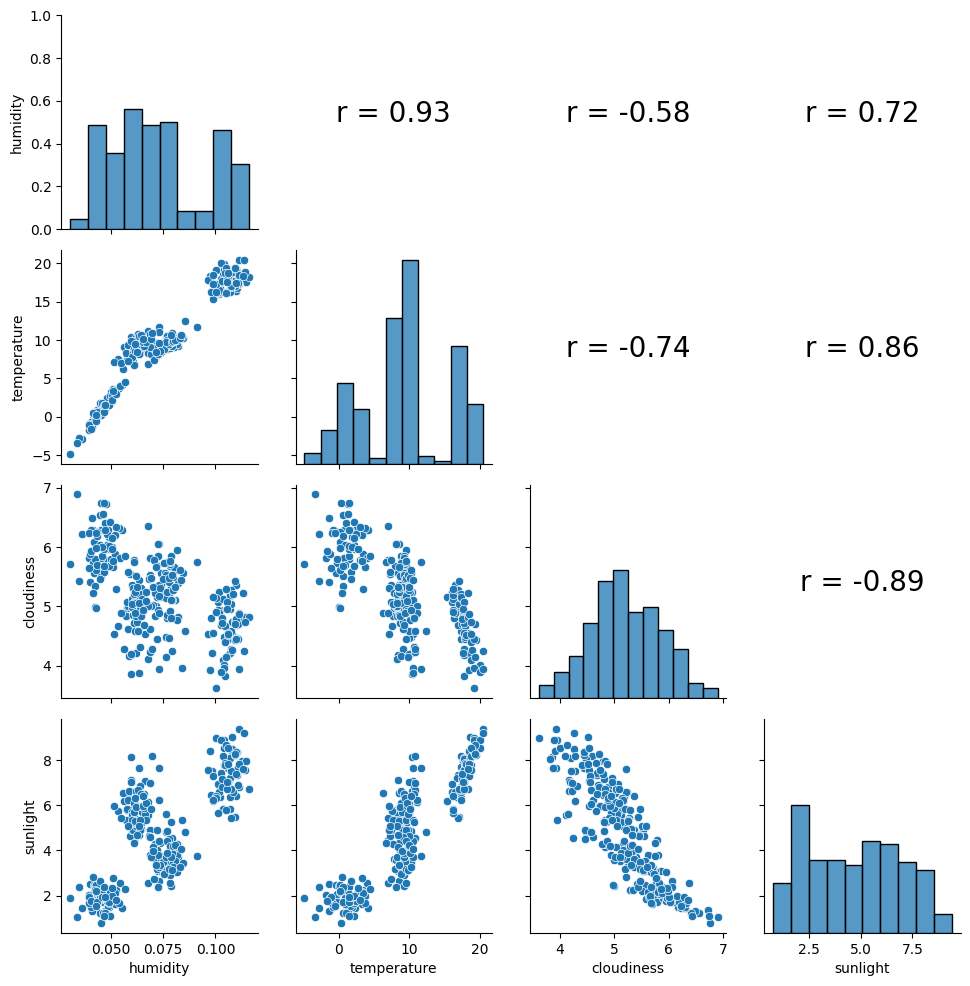

In [8]:
plt.figure(figsize=(12,7))
g = sns.PairGrid(dahlem_weather[["humidity", "temperature", "cloudiness", "sunlight"]])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(reg_spear_coef)

In [15]:
dahlem_weather.describe()

,year,humidity,temperature,cloudiness,sunlight
count,277.000000,277.000000,277.000000,277.000000,277.000000
mean,1984.750903,0.072641,9.275113,5.210452,4.701650
std,20.194688,0.022635,6.121292,0.660497,2.248987
min,1950.000000,0.030694,-4.850000,3.617391,0.781111
25%,1967.000000,0.054624,4.500000,4.794565,2.547253
50%,1985.000000,0.069056,9.210989,5.157609,4.802198
75%,2002.000000,0.091290,12.442857,5.693407,6.497826
max,2020.000000,0.116043,20.492391,6.891111,9.393992


## Display 3dim data

Here is an example on displaying 3dim data.

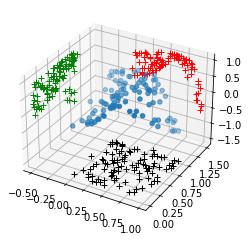

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x= np.random.random(100)
y= np.random.random(100)
z= np.sin(3*x**2+y**2)

fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(x,y,z)

ax.plot(x, z, 'r+', zdir='y', zs=1.5)
ax.plot(y, z, 'g+', zdir='x', zs=-0.5)
ax.plot(x, y, 'k+', zdir='z', zs=-1.5)

plt.show()

## Covariance

Using numpy and from scratch as comparison.

In [4]:
import pandas as pd
import numpy as np

#//X = np.array([[0, 3, 4], [1, 2, 4], [3, 4, 5]]) 
X = np.array([[0, 1, 3], [3, 2, 4], [4, 4, 5]]) 

np.cov(X,rowvar=False)

array([[4.33333333, 2.83333333, 2.        ],
       [2.83333333, 2.33333333, 1.5       ],
       [2.        , 1.5       , 1.        ]])

In [5]:
def covarianceA(X):
    # Extract the number of rows and columns
    N, M = X.shape
    # Calculate the covariance matrix
    cov = np.zeros((M, M))
    for i in range(M):
        # Mean of column "i"
        mean_i = np.sum(X[:, i]) / N
        for j in range(M):
            # Mean of column "j"
            mean_j = np.sum(X[:, j]) / N
            # Covariance between column "i" and column "j"
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
    return cov

print(covarianceA(X))

[[4.33333333 2.83333333 2.        ]
 [2.83333333 2.33333333 1.5       ]
 [2.         1.5        1.        ]]


## PCA from scratch

In [10]:
class PCA:
    def fit_transform(self, X, n_components=2):
        # get number of samples and components
        self.n_samples = X.shape[0]
        self.n_components = n_components
        # standardize data
        self.A = self.standardize_data(X)
        # calculate covariance matrix
        covariance_matrix = self.get_covariance_matrix()
        # retrieve selected eigenvectors
        eigenvectors = self.get_eigenvectors(covariance_matrix)
        # project into lower dimension
        projected_matrix = self.project_matrix(eigenvectors)
        return projected_matrix

    def standardize_data(self, X):
        # subtract mean and divide by standard deviation columnwise
        numerator = X - np.mean(X, axis=0)
        denominator = np.std(X, axis=0)
        return numerator / denominator
    
    def get_covariance_matrix(self, ddof=0):
        # calculate covariance matrix with standardized matrix A
        C = np.dot(self.A.T, self.A) / (self.n_samples-ddof)
        return C

    def get_eigenvectors(self, C):
        # calculate eigenvalues & eigenvectors of covariance matrix 'C'
        eigenvalues, eigenvectors = np.linalg.eig(C)
        # sort eigenvalues descending and select columns based on n_components
        n_cols = np.argsort(eigenvalues)[::-1][:self.n_components]
        selected_vectors = eigenvectors[:, n_cols]
        return selected_vectors

    def project_matrix(self, eigenvectors):
        P = np.dot(self.A, eigenvectors)
        return P

/home/marcel/.local/lib/python3.6/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


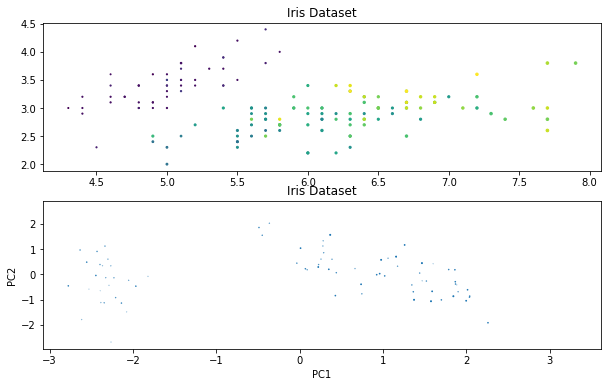

In [51]:
from sklearn import datasets
import matplotlib.pyplot as plt

# load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# instantiate and fit_transform PCA
pca = PCA()
X_pca = pca.fit_transform(X, n_components=3)

# plot results
fig, ax = plt.subplots(2, 1, figsize=(10,6))


ax[0].scatter(X[:,0], X[:,1], X[:,2],X[:,3])

ax[0].set_title('Iris Dataset')


ax[1].scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2])

ax[1].set_title('Iris Dataset')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

plt.show()